# Guía 4

## Ejercicio 1

Genere una señal $s(t) = sin(2\pi f_1t) + 4 sin(2\pi f_2t)$, con $f_1 = 10Hz$ y $f_2 = 20Hz$, y obtenga su versión discreta $s[n]$ con período de muestreo $T = 0,001 s$ en el intervalo de tiempo $t = [0 ... 1) s$. A continuación:

1- Calcule la TDF $s[k]$ de la señal $s[n]$ y grafique el espectro de magnitud de $s[k]$.

2- Verifique la relación de Parseval para la TDF:
$$
E_s = \sum^{N}_{n=1}s[n]^2 = \frac{1}{N} \sum^{N}_{k=1}|S[k]|^2
$$,
donde N es la cantidad de muestras de $s[n]$.

Realice los siguientes cambios y analice los resultados obtenidos:

1- Modifique $s[n]$ de forma tal que:
$$S[n] = sin(2\pi f_1t) + 4sin(2\pi f_2t) + 4$$
y analice los cambios en el espectro de magnitud de $S[k]$.

2- Modifique las frecuencias de las señales seno de forma tal que $f_1 = 10Hz$ y $f_2 = 11Hz$ y analice los cambios en el espectro de magnitud de $s[k]$.

3- Modifique nuevamente las frecuencias de las señales seno de forma tal que $f_1 = 10Hz$ y $f_2 = 10,5 Hz$ ¿Qué ocurre en el espectro de mangitud de $s[k]$?

4- Modifique el intervalo de tiempo de análisis de la siguiente manera: $t = [0 ... 2)$ seg. y analice los cambios en la TDF.

### Solución

Text(-50, 1000, '')

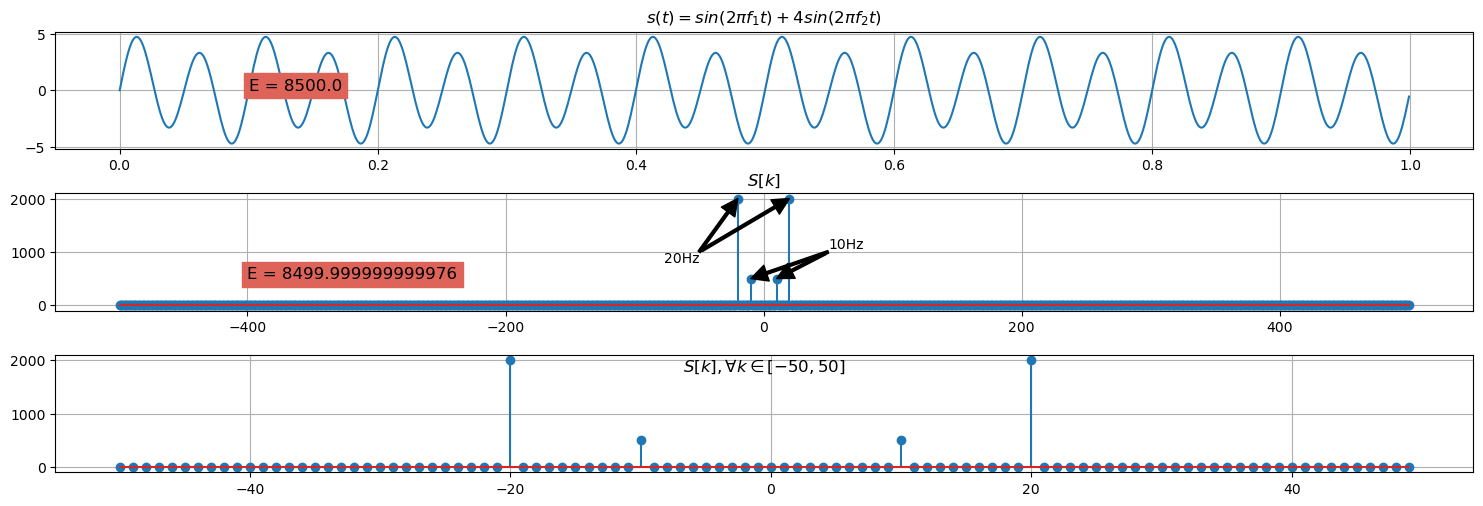

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def senoidal(t,fs,fase=0):
    return np.sin(2*np.pi*fs*t+fase)

def fourier(x):
    '''Devuelve los coeficientes complejos de la transformada de Fourier de x'''
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

# Parametros
Tini = 0
Tfin = 1
T = 0.001
fm = 1.0/T
f1 = 10
f2 = 20

# Generacion de la senial
t = np.linspace(Tini, Tfin, int(fm*(Tfin-Tini)), endpoint=False)
s = np.sum([senoidal(t,f1), 4*senoidal(t,f2)], axis=0)

# Calculos
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
dft = fourier(s)                            # espectro de magnitudes de frecuencias "real" (dividido por N)
Es = np.sum(np.power(s,2))
Edft = np.sum(np.power(np.abs(dft),2))/N

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    x.grid()
ax[0].set_title('$s(t) = sin(2\\pi f_1t) + 4 sin(2\\pi f_2t)$')
ax[1].set_title('$S[k]$')
ax[2].set_title('$S[k], \\forall k \\in [-50,50]$', y=1, pad=-12)

ax[0].plot(t,s)
ax[0].text(0.1, 0, f"E = {Es}", fontsize=12, transform=ax[0].transData, bbox=dict(boxstyle='square', color='#DE6459'))

ax[1].stem(f,np.abs(dft))
ax[1].text(-400, 500, f"E = {Edft}", fontsize=12, transform=ax[1].transData, bbox=dict(boxstyle='square', color='#DE6459'))

subt = np.r_[0:50,-50:0]       # subconjunto de muestras del espectro
ax[2].stem(f[subt],np.abs(dft)[subt])

# marcar frecuencias
ax[1].annotate(f"{f1}Hz", xy=(f1, 500), xytext=(50, 1000),
               horizontalalignment='left',
               verticalalignment='bottom',
               arrowprops=dict(facecolor='black', shrink=10, width=2))
ax[1].annotate('', xy=(-f1, 500), xytext=(50, 1000),
               horizontalalignment='left',
               verticalalignment='bottom',
               arrowprops=dict(facecolor='black', shrink=10, width=2))

ax[1].annotate(f"{f2}Hz", xy=(f2, 2000), xytext=(-50, 1000),
               horizontalalignment='right',
               verticalalignment='top',
               arrowprops=dict(facecolor='black', shrink=10, width=2))
ax[1].annotate('', xy=(-f2, 2000), xytext=(-50, 1000),
               horizontalalignment='right',
               verticalalignment='top',
               arrowprops=dict(facecolor='black', shrink=10, width=2))


2- Modifique las frecuencias de las señales seno de forma tal que $f_1 = 10Hz$ y $f_2 = 11Hz$ y analice los cambios en el espectro de magnitud de $s[k]$.

Text(-50, 1000, '')

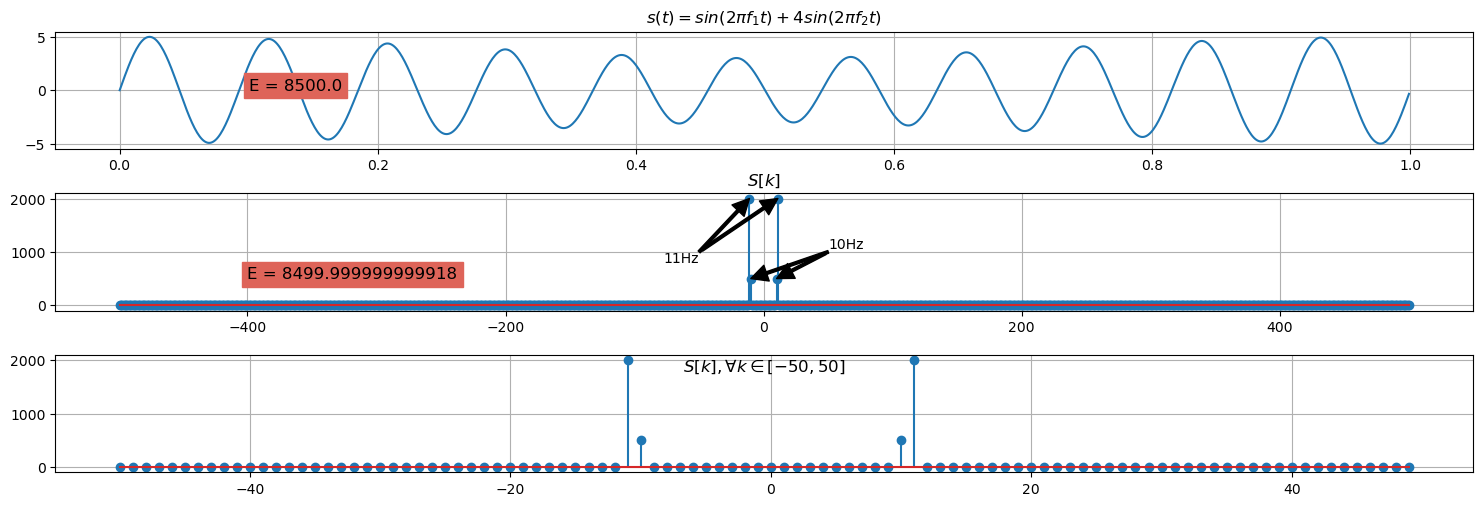

In [2]:
# Parametros
Tini = 0
Tfin = 1
T = 0.001
fm = 1.0/T
f1 = 10
f2 = 11

# Generacion de la senial
t = np.linspace(Tini, Tfin, int(fm*(Tfin-Tini)), endpoint=False)
s = np.sum([senoidal(t,f1), 4*senoidal(t,f2)], axis=0)

# Calculos
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
dft = fourier(s)                            # espectro de magnitudes de frecuencias "real" (dividido por N)
Es = np.sum(np.power(s,2))
Edft = np.sum(np.power(np.abs(dft),2))/N

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    x.grid()
ax[0].set_title('$s(t) = sin(2\\pi f_1t) + 4 sin(2\\pi f_2t)$')
ax[1].set_title('$S[k]$')
ax[2].set_title('$S[k], \\forall k \\in [-50,50]$', y=1, pad=-12)

ax[0].plot(t,s)
ax[0].text(0.1, 0, f"E = {Es}", fontsize=12, transform=ax[0].transData, bbox=dict(boxstyle='square', color='#DE6459'))
ax[1].stem(f,np.abs(dft))
ax[1].text(-400, 500, f"E = {Edft}", fontsize=12, transform=ax[1].transData, bbox=dict(boxstyle='square', color='#DE6459'))

subt = np.r_[0:50,-50:0]       # subconjunto de muestras del espectro
ax[2].stem(f[subt],np.abs(dft)[subt])

# marcar frecuencias
ax[1].annotate(f"{f1}Hz", xy=(f1, 500), xytext=(50, 1000),
               horizontalalignment='left',
               verticalalignment='bottom',
               arrowprops=dict(facecolor='black', shrink=10, width=2))
ax[1].annotate('', xy=(-f1, 500), xytext=(50, 1000),
               horizontalalignment='left',
               verticalalignment='bottom',
               arrowprops=dict(facecolor='black', shrink=10, width=2))

ax[1].annotate(f"{f2}Hz", xy=(f2, 2000), xytext=(-50, 1000),
               horizontalalignment='right',
               verticalalignment='top',
               arrowprops=dict(facecolor='black', shrink=10, width=2))
ax[1].annotate('', xy=(-f2, 2000), xytext=(-50, 1000),
               horizontalalignment='right',
               verticalalignment='top',
               arrowprops=dict(facecolor='black', shrink=10, width=2))

3- Modifique nuevamente las frecuencias de las señales seno de forma tal que $f_1 = 10Hz$ y $f_2 = 10,5 Hz$ ¿Qué ocurre en el espectro de mangitud de $s[k]$?

<StemContainer object of 3 artists>

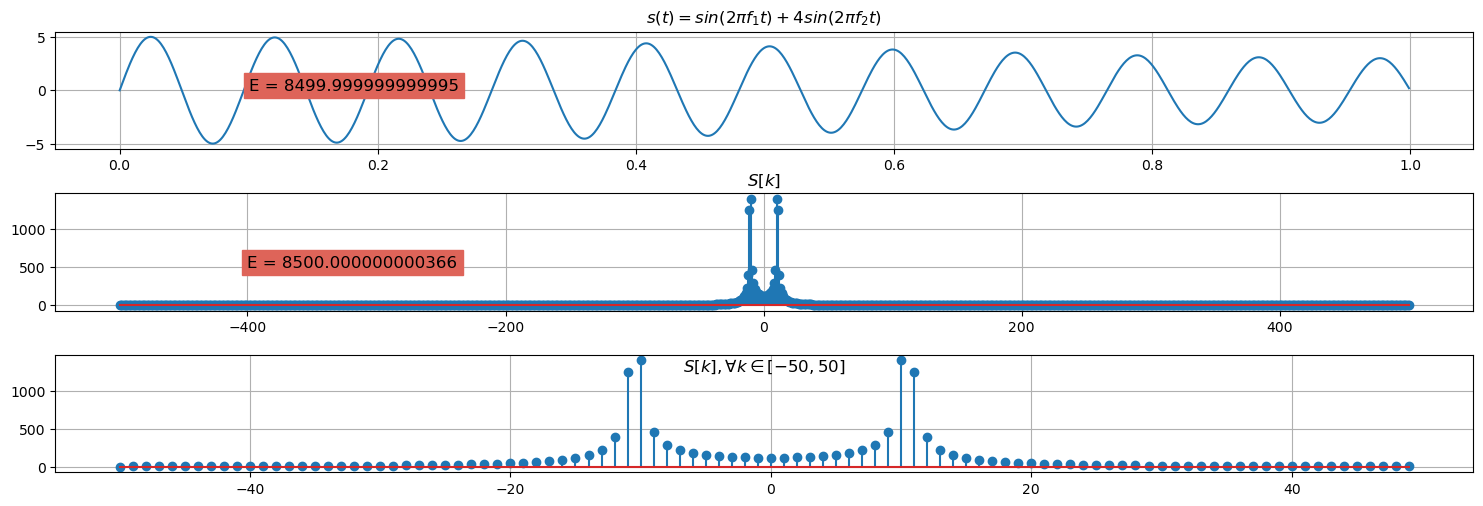

In [3]:
# Parametros
Tini = 0
Tfin = 1
T = 0.001
fm = 1.0/T
f1 = 10
f2 = 10.5

# Generacion de la senial
t = np.linspace(Tini, Tfin, int(fm*(Tfin-Tini)), endpoint=False)
s = np.sum([senoidal(t,f1), 4*senoidal(t,f2)], axis=0)

# Calculos
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
dft = fourier(s)                            # espectro de magnitudes de frecuencias "real" (dividido por N)
Es = np.sum(np.power(s,2))
Edft = np.sum(np.power(np.abs(dft),2))/N

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    x.grid()
ax[0].set_title('$s(t) = sin(2\\pi f_1t) + 4 sin(2\\pi f_2t)$')
ax[1].set_title('$S[k]$')
ax[2].set_title('$S[k], \\forall k \\in [-50,50]$', y=1, pad=-12)

ax[0].plot(t,s)
ax[0].text(0.1, 0, f"E = {Es}", fontsize=12, transform=ax[0].transData, bbox=dict(boxstyle='square', color='#DE6459'))
ax[1].stem(f,np.abs(dft))
ax[1].text(-400, 500, f"E = {Edft}", fontsize=12, transform=ax[1].transData, bbox=dict(boxstyle='square', color='#DE6459'))

subt = np.r_[0:50,-50:0]       # subconjunto de muestras del espectro
ax[2].stem(f[subt],np.abs(dft)[subt])

4- Modifique el intervalo de tiempo de análisis de la siguiente manera: $t = [0 ... 2)$ seg. y analice los cambios en la TDF.

<StemContainer object of 3 artists>

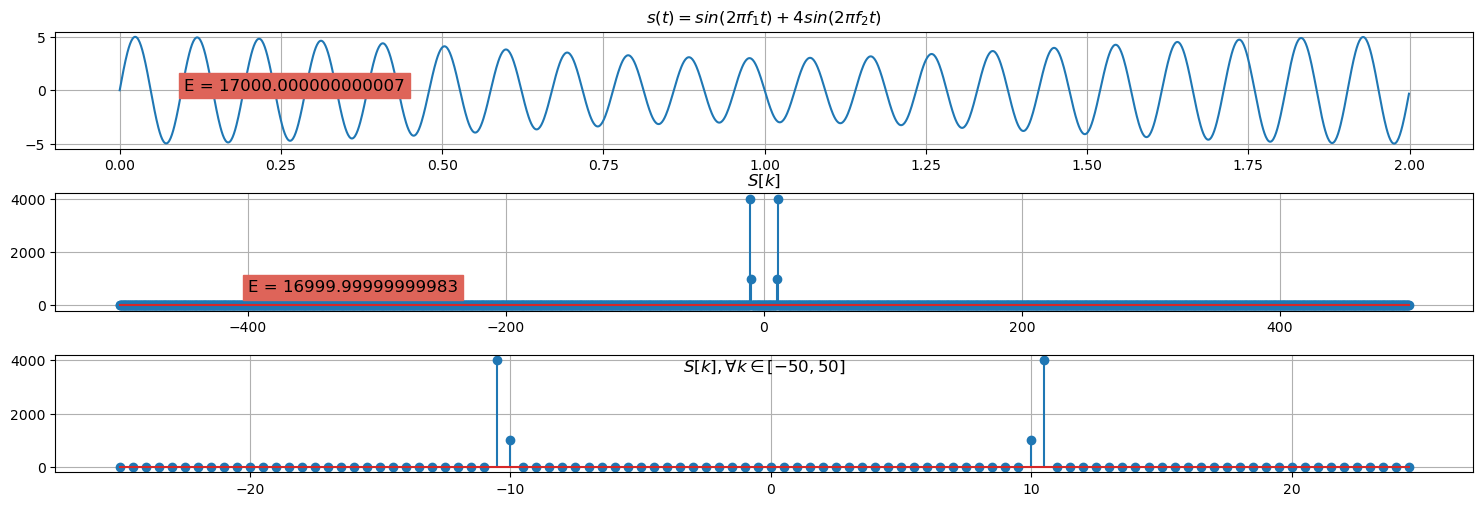

In [4]:
# Parametros
Tini = 0
Tfin = 2
T = 0.001
fm = 1.0/T
f1 = 10
f2 = 10.5

# Generacion de la senial
t = np.linspace(Tini, Tfin, int(fm*(Tfin-Tini)), endpoint=False)
s = np.sum([senoidal(t,f1), 4*senoidal(t,f2)], axis=0)

# Calculos
N = len(t)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2)+1,N):
    f[k] = f[k]-fm
dft = fourier(s)                            # espectro de magnitudes de frecuencias "real" (dividido por N)
Es = np.sum(np.power(s,2))
Edft = np.sum(np.power(np.abs(dft),2))/N

# Graficas
fig, ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    x.grid()
ax[0].set_title('$s(t) = sin(2\\pi f_1t) + 4 sin(2\\pi f_2t)$')
ax[1].set_title('$S[k]$')
ax[2].set_title('$S[k], \\forall k \\in [-50,50]$', y=1, pad=-12)

ax[0].plot(t,s)
ax[0].text(0.1, 0, f"E = {Es}", fontsize=12, transform=ax[0].transData, bbox=dict(boxstyle='square', color='#DE6459'))
ax[1].stem(f,np.abs(dft))
ax[1].text(-400, 500, f"E = {Edft}", fontsize=12, transform=ax[1].transData, bbox=dict(boxstyle='square', color='#DE6459'))

subt = np.r_[0:50,-50:0]       # subconjunto de muestras del espectro
ax[2].stem(f[subt],np.abs(dft)[subt])